In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
pd.options.display.max_columns = None

In [60]:
train = pd.read_csv("./train.csv")
test = pd.read_csv("./test.csv")

In [61]:
train.head()

,Churn,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,No,8259-DZLIZ,Female,0,Yes,Yes,64,Yes,Yes,DSL,No,Yes,No,No,No,No,One year,Yes,Bank transfer (automatic),53.85,3399.85
1,No,1764-VUUMT,Male,0,No,Yes,66,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),19.95,1269.1
2,Yes,1320-HTRDR,Female,0,No,No,3,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,75.50,220.6
3,No,1047-RNXZV,Male,0,No,No,43,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.55,876.15
4,No,0513-RBGPE,Male,0,Yes,Yes,37,Yes,Yes,DSL,Yes,No,Yes,Yes,No,No,Two year,Yes,Credit card (automatic),62.80,2278.75


In [11]:
test.head()

,Churn,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,No,1985-MBRYP,Female,0,No,No,43,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),19.65,779.25
1,No,4878-BUNFV,Male,0,Yes,Yes,42,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.70,828.85
2,No,8728-SKJLR,Male,0,No,No,41,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,74.25,3089.1
3,Yes,7931-PXHFC,Male,0,No,No,38,Yes,No,DSL,No,No,Yes,Yes,No,Yes,One year,Yes,Mailed check,62.30,2354.8
4,Yes,2057-ZBLPD,Female,0,Yes,No,21,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,86.50,1808.7


# Analisi 

In [12]:
train.dtypes

Churn                object
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
dtype: object

In [13]:
train.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,4225.000000,4225.000000,4225.000000
mean,0.157870,32.382722,64.828036
std,0.364662,24.458995,30.118339
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.750000
50%,0.000000,29.000000,70.450000
75%,0.000000,55.000000,90.100000
max,1.000000,72.000000,118.600000


## Alcune considerazioni
- 3 feature numeriche già pronte all'uso (potrebbero esserne altre)
- La metà dei clienti ha un contratto da almeno 2 anni

## Valori mancanti

In [14]:
train.isnull().sum()

Churn               0
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

Pare non esserci valori nulli. La colonna TotalCharges però ha due problemi: deve essere convertita a float, contiene delle righe vuote.

In [15]:
len(train[train.TotalCharges == ''])

0

In [16]:
len(train[train.TotalCharges == ' '])

9

Ci sono delle righe di TotalCharges vuote. Come le sostituiamo? Idealmente TotalCharges rappresenta il totale delle fatture pagate. Quindi dovrebbe bastare moltiplicare la "tenure" (numero di mesi dell'abbonamento) per il costo mensile (considerando idealmente che il costo non aumenti nei mesi).

In [17]:
train[train.TotalCharges == ' '][['tenure', 'MonthlyCharges', 'TotalCharges']]

,tenure,MonthlyCharges,TotalCharges
785,0,25.75,
992,0,19.85,
1444,0,61.90,
1501,0,20.25,
2474,0,25.35,
2493,0,56.05,
3619,0,19.70,
3710,0,52.55,
4024,0,80.85,


a confermare la nostra ipotesi è il fatto che la tenure in queste righe è 0. Probabilmente è stato inserito un valore vuoto invece che 0 nel caso di abbonamenti che non sono durati nemmeno un mese. Sostituiamo quindi i valori vuoti con il risultato della moltiplicazione detta sopra. In realtà, però, potremmo sostituire direttamente 0.

In [39]:
train.TotalCharges.replace(to_replace=" ", value=0, inplace=True)
test.TotalCharges.replace(to_replace=" ", value=0, inplace=True)

### CustomerID

In [19]:
train.customerID.nunique()

4225

In [20]:
try: 
    train = train.drop(columns=['customerID'])
    test = test.drop(columns=['customerID'])
except:
    print("CustomerID non presente")

CustomerID è un valore univoco per ogni cliente, perciò non influenza la probabilità di Churn

### Churn - Variabile target

In [21]:
train.Churn.value_counts()

No     3110
Yes    1115
Name: Churn, dtype: int64

<AxesSubplot:xlabel='Churn', ylabel='count'>

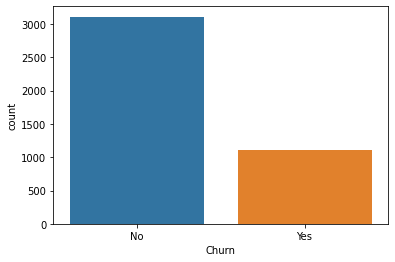

In [22]:
sns.countplot(x='Churn', data=train)

I clienti con Churn "NO" sono circa il triplo dei "Yes"

### Gender
Indica se il cliente è uomo o donna

In [23]:
train.gender.value_counts()

Male      2197
Female    2028
Name: gender, dtype: int64

<AxesSubplot:xlabel='gender', ylabel='count'>

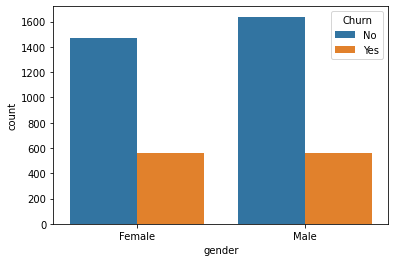

In [24]:
sns.countplot(x="gender", hue='Churn', data=train)

Il gender sembra non essere particolarmente influente sulla probabilità di Churn (è quasi equamente distributo al 50%)

### MonthlyCharges
Rappresenta il costo mensile dell'abbonamento

<Figure size 576x432 with 0 Axes>

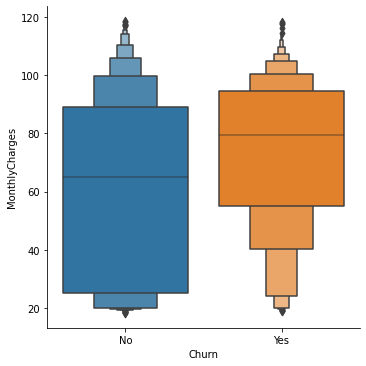

In [32]:
plt.figure(figsize=(8,6))
sns.catplot(x='Churn', y='MonthlyCharges', data=train, kind="boxen")

Dal grafico sembra che al diminuire dell'abbonamento mensile aumentino i Churn negativi. All'aumentare è difficile fare una stima, probabilmente c'è qualche altra feature che ne determina l'esito.

In [27]:
#sns.catplot(x='Churn', y='TotalCharges', data=df, kind="violin")

In [28]:
sns.lmplot(x='MonthlyCharges', y='tenure', hue='Churn', data=df)

NameError: name 'df' is not defined

C:\Users\Jacopo\AppData\Roaming\Python\Python39\site-packages\seaborn\categorical.py:1296: UserWarning: 78.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Jacopo\AppData\Roaming\Python\Python39\site-packages\seaborn\categorical.py:1296: UserWarning: 50.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Churn', ylabel='tenure'>

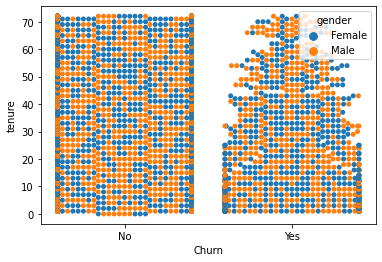

In [281]:
train.StreamingTV

0                        No
1       No internet service
2                        No
3       No internet service
4                        No
               ...         
4220                     No
4221                    Yes
4222    No internet service
4223                    Yes
4224                     No
Name: StreamingTV, Length: 4216, dtype: object

In [282]:
train.StreamingTV = train.StreamingTV.map(lambda el: 1 if el == 'Yes' else 0)

<AxesSubplot:xlabel='StreamingTV', ylabel='count'>

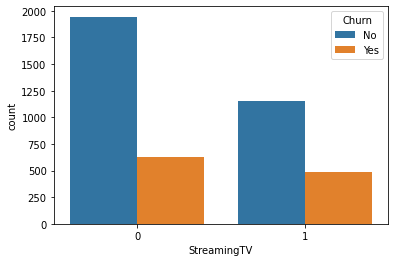

In [284]:
sns.(x='StreamingTV', hue='Churn', data=train)

In [310]:
train[['Partner', 'Churn']]

,Partner,Churn
0,Yes,No
1,No,No
2,No,Yes
3,No,No
4,Yes,No
...,...,...
4220,Yes,No
4221,Yes,Yes
4222,No,No
4223,No,Yes


In [306]:
#

# Encoding
Verrà applicato sia al file di train che al file di test (dato che hanno la stessa struttura)

### TotalCharges
TotalCharges va solamente convertita a float

In [40]:
train.TotalCharges = pd.to_numeric(train.TotalCharges, downcast="float")
test.TotalCharges = pd.to_numeric(test.TotalCharges, downcast="float")

In [41]:
test.TotalCharges

0        779.250000
1        828.849976
2       3089.100098
3       2354.800049
4       1808.699951
           ...     
1404    2979.500000
1405      74.900002
1406      25.250000
1407     702.900024
1408     653.950012
Name: TotalCharges, Length: 1409, dtype: float32

In [42]:
train.dtypes

Churn                object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float32
dtype: object

Definisco una funzione che converte Yes e No e in 1 e 0, da utilizzare per convertire le feature in numeriche binarie.

In [63]:
def convertCatToNumeric(s):
    if s == 1 or s == 0:
        return s
    return 1 if s == "Yes" else 0 

In [64]:
train.Churn = train.Churn.map(convertCatToNumeric)

In [65]:
train.Churn

0       0
1       0
2       1
3       0
4       0
       ..
4220    0
4221    1
4222    0
4223    1
4224    1
Name: Churn, Length: 4225, dtype: int64